# Setup and workflow configuration

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import tools

# Print charts in the notebook, using retina graphics
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Setup seaborn graphs
sns.set_context("talk")
sns.set(style="darkgrid", color_codes=True)

verbose = False

# Project configuration
# Note: connection (domain, user, pass) can be set in .env file.
#       Values specified in the configuration overwrite .env values.
config_yaml = """
  connection:
    domain: http://ecosystem.atlassian.net
    username: __none__
    password: __none__

  criteria:
    project: AC
    issue types:
      - Support Request
      - Documentation
      - Improvement
      - Bug
      - New Feature
    valid resolutions:
      - Answered
      - Fixed

    jql: |
      created > -1000d OR resolved > -1000d

  attributes:
    priority: Priority
    components: Component/s
    story_points: Story Points

  workflow:
    Backlog:
      - Open
      - To Do
    Triage:
      - Triage
      - Under Review
    In Progress:
      - In Progress
    Done:
      - Closed
"""

# Fetch data from JIRA

In [216]:
q, cycle_data = tools.calc_cycle_data(config_yaml, verbose)
cfd_data = q.cfd(cycle_data)
scatter_data = q.scatterplot(cycle_data)
histogram_data = q.histogram(cycle_data)
percentile_data = q.percentiles(cycle_data, percentiles=[.5, .8, .95])
daily_throughput_data = q.throughput_data(cycle_data)


# Story points vs actual cycle times

95 out of 522 issues have both story point and cycle time


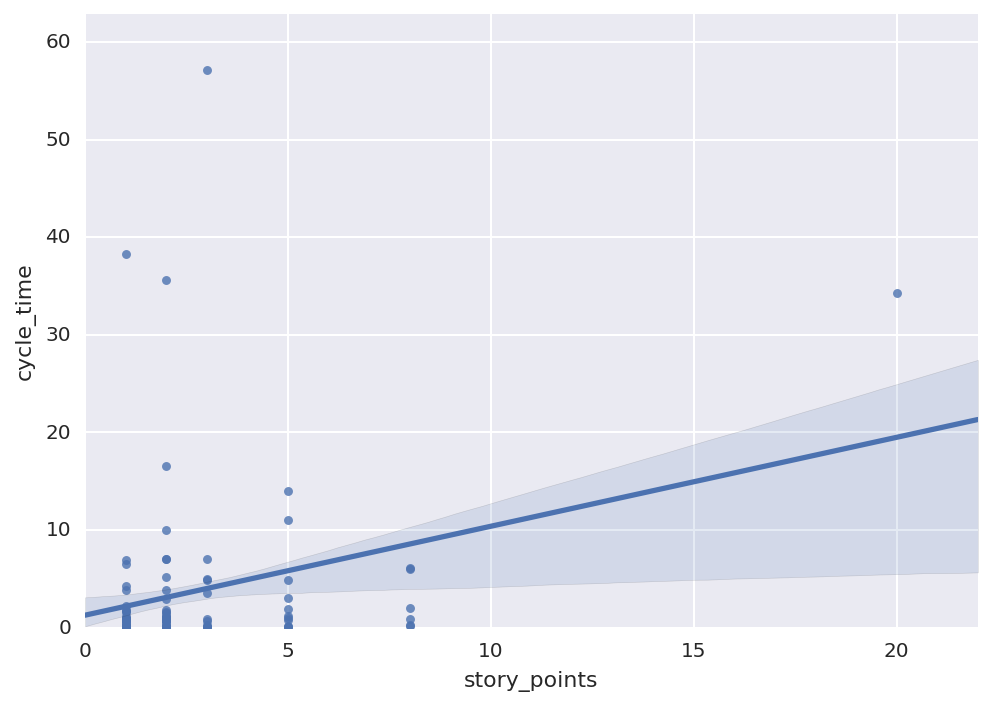

In [228]:
cd = cycle_data.dropna(axis='index', how='any', subset=['story_points', 'cycle_time']).copy()
print('{} out of {} issues have both story point and cycle time'.format(len(cd), len(cycle_data)))
# convert story_points into numeric values
cd.loc[:,'story_points'] = cd['story_points'].astype(int)
# convert 'cycle_time' to float representation of timedelta
cd.loc[:,'cycle_time'] = cd['cycle_time'].astype('timedelta64')
# nanoseconds to days
cd['cycle_time'] /= 1e+9 * 60*60*24
# set up axes limits
axes = plt.gca()
axes.set_xlim([0,cd['story_points'].max()*1.1])
axes.set_ylim([0,cd['cycle_time'].max()*1.1])
# plot scatter data with linear regression
g = sns.regplot(x="story_points", y="cycle_time", data=cd, ci=68, x_jitter=0, ax=axes)